# Prepare dataset

In [1]:
import numpy as np
import pandas as pd

'''
1 0.346 0.780 0
2 0.303 0.439 0
3 0.358 0.729 0
4 0.602 0.863 1
5 0.790 0.753 1
6 0.611 0.965 1
'''
# Create training dataset
x1_train = np.array([0.346, 0.303, 0.358, 0.602, 0.790, 0.611]).reshape(-1,1)
x2_train = np.array([0.780, 0.439, 0.729, 0.863, 0.753, 0.965]).reshape(-1,1)
y_train = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)
X_train = np.concatenate((x1_train, x2_train), axis = 1)
print("Training dataset: \n", X_train, y_train)

'''
1 0.959 0.382 0
2 0.750 0.306 0
3 0.395 0.760 0
4 0.823 0.764 1
5 0.761 0.874 1
6 0.844 0.435 1
'''
# Create test dataset
x1_test = np.array([0.959, 0.750, 0.395, 0.823, 0.761, 0.844]).reshape(-1,1)
x2_test = np.array([0.382, 0.306, 0.760, 0.764, 0.874, 0.435]).reshape(-1,1)
y_test = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1)
X_test = np.concatenate((x1_test, x2_test), axis = 1)
print("\n\n Test dataset: \n", X_test, y_test)

Training dataset: 
 [[0.346 0.78 ]
 [0.303 0.439]
 [0.358 0.729]
 [0.602 0.863]
 [0.79  0.753]
 [0.611 0.965]] [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


 Test dataset: 
 [[0.959 0.382]
 [0.75  0.306]
 [0.395 0.76 ]
 [0.823 0.764]
 [0.761 0.874]
 [0.844 0.435]] [[0]
 [0]
 [0]
 [1]
 [1]
 [1]]


# Define Logistic regression classifier class

In [2]:
class LogisticRegressionClassifier():

    def __init__(self, weights = np.array([1, 1]).reshape(-1, 1), bias = 0):
        self.weights = weights
        self.bias = bias

    def fit(self, X_train, y_train, batch_size, epochs, learning_rate, precision_for_loss):
        number_of_samples, number_of_features = X_train.shape
        losses = [0]
        for epoch in range(epochs):
            number_of_batches = (number_of_samples-1)//batch_size + 1
            for i in range(number_of_batches):
                batch_start = i*batch_size
                batch_end = batch_start + batch_size
                X_batch = X_train[batch_start : batch_end]
                y_batch = y_train[batch_start : batch_end]
            
                y_pred = self.calculate_sigmoid(np.dot(X_batch, self.weights) + self.bias)
                gradient_for_weights, gradient_for_bias = self.calculate_gradients(X_batch, y_batch, y_pred)

                self.weights -= learning_rate * gradient_for_weights
                self.bias -= learning_rate * gradient_for_bias
        
            loss = self.calculate_loss(y_train, self.calculate_sigmoid(np.dot(X_train, self.weights) + self.bias))
            if(precision_for_loss > abs(abs(loss)-abs(losses[-1]))):
                losses.append(loss)
                print("\nStopping as gradient decent has converged after {} epochs!".format(epoch+1))
                break
            losses.append(loss)

            if(epoch == 1):
                print("\nWeights after epoch 1: ", self.weights)
                print("Bias after epoch 1: ", self.bias)
        
        return self.weights, self.bias, losses

    def predict(self, X_test):
        predicted_probabilities = self.calculate_sigmoid(np.dot(X_test, self.weights) + self.bias)
        y_pred = [1 if probability > 0.5 else 0 for probability in predicted_probabilities]
        return np.array(y_pred)

    def calculate_sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def calculate_loss(self, y_true, y_pred):
        loss = (-1) * np.mean(y_true*(np.log(y_pred)) - (1 - y_true)*np.log(1 - y_pred))
        return loss

    def calculate_gradients(self, X, y_true, y_pred):
        number_of_samples = X.shape[0]
        gradient_for_weights = (1/number_of_samples)*np.dot(X.T, (y_pred - y_true))
        gradient_for_bias = (1/number_of_samples)*np.sum((y_pred - y_true)) 
        return gradient_for_weights, gradient_for_bias

# Train and test(find accuracy, precision, recall)

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Training 
logisticRegressor = LogisticRegressionClassifier(weights = np.array([1.5, 0.5]).reshape(-1,1), bias = -1)
weights, bias, losses = logisticRegressor.fit(X_train, y_train, batch_size = 1, epochs = 10000, learning_rate = 0.1, precision_for_loss = 0.000001)
print("\nFinal weights and bias after convergence: {} and {}".format(weights, bias))
print("Losses per epoch: ", losses)

# Testing
y_pred =  logisticRegressor.predict(X_test)
print("\nPredicted results for test data : ", y_pred)
print("Accuracy: ", accuracy_score(y_test, np.array(y_pred).reshape(-1,1)))
print("Precision: ", precision_score(y_test, np.array(y_pred).reshape(-1,1)))
print("Recall: ", recall_score(y_test, np.array(y_pred).reshape(-1,1)))


Weights after epoch 1:  [[1.57858217]
 [0.54353803]]
Bias after epoch 1:  -1.0121159781467859

Stopping as gradient decent has converged after 3003 epochs!

Final weights and bias after convergence: [[19.86202622]
 [ 5.1623784 ]] and -13.7231510390963
Losses per epoch:  [0, -0.06973351672667841, -0.08031497419654997, -0.08811297605130401, -0.09382093830362948, -0.09795718135961036, -0.10091015945604825, -0.10297163966321558, -0.1043611645448869, -0.10524417452885027, -0.10574548957733525, -0.10595937400191313, -0.10595707231507756, -0.1057924649536653, -0.1055063210967419, -0.1051295015312383, -0.10468537381816556, -0.10419163535716776, -0.10366169067956503, -0.10310569271090315, -0.10253133046579134, -0.10194442523801343, -0.10134938205519078, -0.10074953167885377, -0.10014738978712871, -0.09954485346558344, -0.09894335022116978, -0.0983439510278004, -0.0977474561126126, -0.09715446007621002, -0.09656540134031939, -0.0959805997059886, -0.09540028488945652, -0.09482461820933151, -0.09

# Decision boundary after convergence

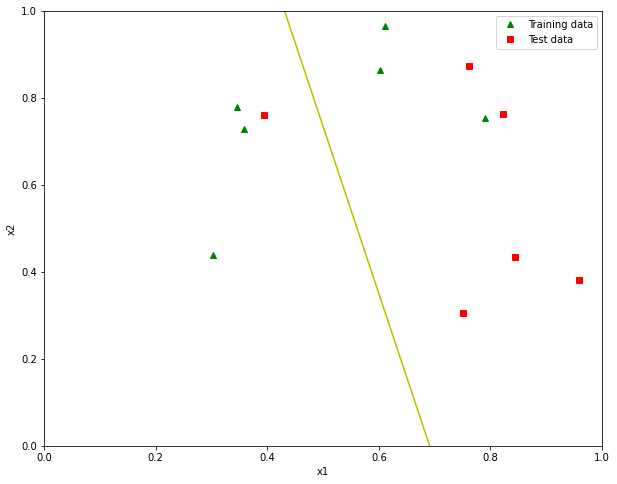

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
plt.plot(X_train[:, 0], X_train[:, 1], "g^")
plt.plot(X_test[:, 0], X_test[:, 1], "rs")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(['Training data', 'Test data'], loc='upper right')
plt.xlabel("x1")
plt.ylabel("x2")

x1 = [min(X_train[:,0]), max(X_train[:,0])]
m = -weights[0]/weights[1]
c = -bias/weights[1]
x2 = m*x1 + c
plt.plot(x1, x2, 'y-')